# Visualize training data for escape in the Hénon-Heiles system

In [37]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from functools import partial

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Helvetica']

# plt.style.use('seaborn-white') # use sans-serif fonts
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['figure.figsize'] = 5, 5

mpl.rcParams['axes.spines.left'] = True   ## display axis spines
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['ytick.major.width'] = 1.0

import henonheiles
import importlib
importlib.reload(henonheiles)
import henonheiles as HH2dof



In [116]:

# RelTol = 3.e-10
# AbsTol = 1.e-10 
rel_tol = 1.e-12
abs_tol = 1.e-14

save_plot = True

# total_energy = 1/6 + 0.1
total_energy = 0.17
time_span = [0, 1000]
# m_x, m_y, omega_x, omega_y, delta
params = [1.0, 1.0, 1.0, 1.0, 1.0] # parameters from Demian-Wiggins (2017)

# init_cond = [0, 0, -0.7]
# init_cond = [0, 0, -0.6]
# non-reactive
# init_cond = [0, 0, 0.55] 
# init_cond = [0, 0, 0.25]
# init_cond = [0.0, 0, 0.35]
# init_cond = [0.0, 0, 0.45]
# init_cond = [0, 0, 0.52]
# init_cond = [0, 0, 0.48]


#reactive
# init_cond = [0, 0, 0.518986]
# init_cond = [0, 0, 0.5175]
# init_cond = [0, 0, 0.516] # short escape, left exit
# init_cond = [0, 0, 0.526] # long escape, right exit
# init_cond = [0, 0, 0.05175]
# init_cond = [0, 0, 0.07] # short escape, top exit
init_cond = [0, 0, 0.08] # long escape, top exit

py = HH2dof.momentum_fixed_energy(init_cond[0], init_cond[1], init_cond[2], \
                                  params, total_energy)
init_cond.append(py)

# func = partial(HH2dof.vector_field, params)
# sol = solve_ivp(func, time_span, init_cond, dense_output = True, \
#                 rtol = rel_tol, atol = abs_tol)

sol = solve_ivp(HH2dof.vector_field, time_span, init_cond, \
                args = params, \
                events = (HH2dof.event_escape_left, HH2dof.event_escape_right, HH2dof.event_escape_top), \
                dense_output = True, \
                rtol = rel_tol, atol = abs_tol)

print(init_cond)


[0, 0, 0.08, 0.5775811631277461]


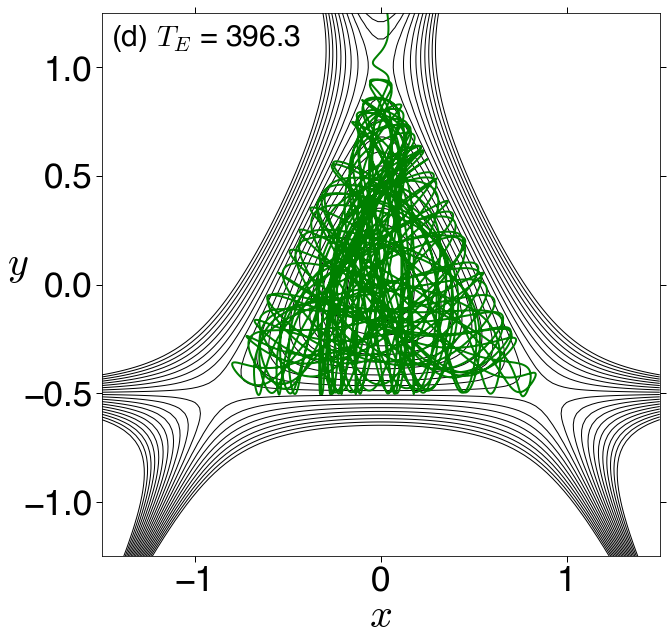

In [117]:


ls_axes = 40
ls_tick = 35 #10, 20
mpl.rcParams['xtick.labelsize'] = ls_tick
mpl.rcParams['ytick.labelsize'] = ls_tick
mpl.rcParams['axes.labelsize'] = ls_axes 
traj_lw = 2

xRes = 100
yRes = 100
xVec = np.linspace(-1.5, 1.5, xRes)
yVec = np.linspace(-1.25, 1.25, yRes)

# pe_cont_vals = [1/6, total_energy]
pe_cont_vals = np.linspace(0,0.3,20, endpoint = True)
pe_cont_cols = ['k']

fig_traj_pes = plt.figure(figsize = (10,10))
ax_traj_pes = fig_traj_pes.gca()
xMesh, yMesh = np.meshgrid(xVec, yVec)
pe_surf = HH2dof.potential_energy(xMesh, yMesh, params[2:])
ax_traj_pes.contour(xMesh, yMesh, pe_surf, levels = pe_cont_vals, \
                   colors = pe_cont_cols, linewidths = 1.0)
ax_traj_pes.set_ylabel(r'$y$', labelpad = 5, rotation = 0)
ax_traj_pes.set_xlabel(r'$x$', labelpad = 0)
# cbar = plt.colorbar(cset, orientation = 'vertical', \
#                     shrink = 0.9, pad = 0.01, drawedges = True)
# cbar.ax.set_yticklabels(['{:.02f}'.format(x) for x in np.arange(0, 0.20, 0.02)])
# cbar.ax.tick_params(labelsize = ls_tick - 10)

ax_traj_pes.plot(sol.y[0,:], sol.y[1,:], '-g', linewidth = traj_lw)
# ax_traj_pes.text(0.5,1.1, r'$T_E$ = %.1f'%(sol.t_events[2]), fontsize = 30)
ax_traj_pes.text(-1.45,1.1, r'(d) $T_E$ = %.1f'%(sol.t_events[2]), fontsize = 30)
plt.savefig('temp01.png', dpi = 300, bbox_inches = 'tight')



## Statistics of the Henon-Heiles dynamics

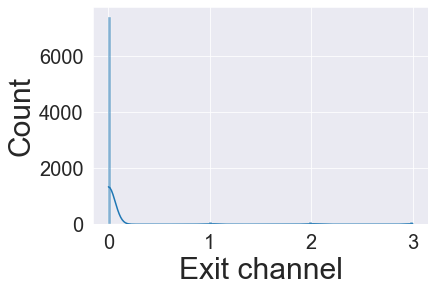

In [19]:

import pandas as pd

import seaborn as sns

total_energy = 0.17
training_data_size = 10000
training_data_time = 30

datapath = '../data/hh2dof_firstRIs/svcr/'

# data = pd.read_csv(datapath + 'hh_escape_samples625_E%.3f'%(total_energy) \
#                    + '_T%.3f'%(time) + '.txt', \
#                    sep = " ", header = None, \
#                    names = ["x", "y", "p_x", "p_y","Exit channel"])
data = pd.read_csv(datapath + 'hh_escape_samples%d'%(training_data_size) \
                   + '_E%.3f'%(total_energy) \
                   + '_T%.3f'%(training_data_time) + '.txt', \
                   sep = " ", header = None, \
                   names = ["x", "y", "p_x", "p_y", "TE", "LD", "Exit channel"])

data = data.dropna()
sns.set_style('darkgrid')
# sns.histplot(data["LD"], bins = 100, kde=True)
sns.histplot(data["Exit channel"], bins = 100, kde = True)
# plt.hist(data["LD"], bins='auto')
# plt.hist(data["Exit channel"], bins='auto')



## Plotting the reactive islands computed using the stable manifolds intersection with the section at y = 0

Training data for different energies and time

In [ ]:
# %matplotlib 

import joblib
import pandas as pd

# y_constant = 0
y_constant = -0.25
#y_constant = 0.5

total_energy = 0.19
manifold_time = 30

# datapath_ris = '../../henonheiles/data/manifolds_E17e-2/firstRIs/'
datapath_ris = '../../henonheiles/data/manifolds_E19e-2/firstRIs_sos_y-0.25/'

# datapath_ris = '../../henonheiles/tube-manifolds/'

trainingdata_size = 625
trainingdata_time = 30

# datapath_trainingdata = './hh2dof_firstRIs/adaptive_trainingdata_size/'
datapath_trainingdata = './hh2dof_firstRIs_sos_y-0.25/adaptive_trainingdata_size/'
# datapath_trainingdata = './hh2dof_firstRIs/fixed_trainingdata_size/'
# datapath_trainingdata = './'

# data['Exit channel'].plot.hist()
params = [1.0, 1.0, 1.0, 1.0, 1.0] # parameters from Demian-Wiggins (2017)

# Reactive islands on the section y = 0
if total_energy > 0.17:
    smani_topsaddle = np.loadtxt(datapath_ris \
                                 + 'xeU1_stable_branch1_eqPt2_DelE%.6f'%(total_energy - 1/6) + '_t' \
                                 + str(manifold_time) + '.txt')
    smani_leftsaddle = np.loadtxt(datapath_ris \
                                  + 'xeU1_stable_branch1_eqPt3_DelE%.6f'%(total_energy - 1/6) + '_t' \
                                  + str(manifold_time) + '.txt')
    smani_rightsaddle = np.loadtxt(datapath_ris \
                                   + 'xeU1_stable_branch-1_eqPt4_DelE%.6f'%(total_energy - 1/6) + '_t' \
                                   + str(manifold_time) + '.txt')
else:
    smani_topsaddle = np.loadtxt(datapath_ris \
                                 + 'xeU1_stable_branch1_eqPt2_DelE%.7f'%(total_energy - 1/6) + '_t' \
                                 + str(manifold_time) + '.txt')
    smani_leftsaddle = np.loadtxt(datapath_ris \
                                  + 'xeU1_stable_branch1_eqPt3_DelE%.7f'%(total_energy - 1/6) + '_t' \
                                  + str(manifold_time) + '.txt')
    smani_rightsaddle = np.loadtxt(datapath_ris \
                                   + 'xeU1_stable_branch-1_eqPt4_DelE%.7f'%(total_energy - 1/6) + '_t' \
                                   + str(manifold_time) + '.txt')
    

# xMin = -np.sqrt((2*total_energy)/params[2])
# xMax = np.sqrt((2*total_energy)/params[2])

# pxMin = -np.sqrt(2*params[0]*total_energy)
# pxMax = np.sqrt(2*params[0]*total_energy)

# px = lambda x: np.sqrt(2*params[0]*(total_energy - 0.5*params[2]**2*x**2))

# xGrid = np.linspace(xMin, xMax, 501, endpoint = True)
# pxGrid = px(xGrid)
# pxGrid[0] = 0
# pxGrid[-1] = 0

xMax_at_yconstant = np.sqrt((total_energy - \
                     (0.5*params[3]**2*y_constant**2 - \
                      (params[4]/3)*y_constant**3))/(0.5*params[2]**2 + y_constant))
xMin_at_yconstant = -xMax_at_yconstant

pxMax_at_yconstant = np.sqrt(2*params[0]*(total_energy - HH2dof.potential_energy(0,y_constant, params[2:])))
pxMin_at_yconstant = -pxMax_at_yconstant


px_at_yconstant = lambda x: np.sqrt(2*params[0]*(total_energy - \
                                    (0.5*params[2]**2*x**2 + 0.5*params[3]**2*y_constant**2 - \
                                     (params[4]/3.0)*y_constant**3 + x**2*y_constant) ))


xGrid_boundary = np.linspace(xMin_at_yconstant + 1e-10, xMax_at_yconstant - 1e-10, 401, endpoint = True)
pxGrid_boundary = px_at_yconstant(xGrid_boundary)
pxGrid_boundary[0] = 0
pxGrid_boundary[-1] = 0

xGrid_boundary = np.append(xGrid_boundary, np.flip(xGrid_boundary))
pxGrid_boundary = np.append(pxGrid_boundary, -np.flip(pxGrid_boundary))



fig_mani_sect = plt.figure(figsize = (8,8))
ax_mani_sect = fig_mani_sect.gca()
plt.plot(xGrid_boundary, pxGrid_boundary, '-m', linewidth = 2)
plt.plot(smani_topsaddle[:,1], smani_topsaddle[:,3], '.r', markersize = 2)
plt.plot(smani_leftsaddle[:,1], smani_leftsaddle[:,3],'.g', markersize = 2)
plt.plot(smani_rightsaddle[:,1], smani_rightsaddle[:,3],'.b', markersize = 2)

# plt.scatter(training_data["x"], training_data["p_x"], s = 3)

ax_mani_sect.set_ylabel(r'$p_x$', labelpad = 5, rotation = 0, fontsize = 20)
ax_mani_sect.set_xlabel(r'$x$', labelpad = 0, fontsize = 20)


training_data = pd.read_csv(datapath_trainingdata + 'hh_escape_samples' \
                           + str(trainingdata_size) + '_E%.3f'%(total_energy) \
                           + '_T%.3f'%(trainingdata_time) + '.txt', \
                           sep = " ", header = None, \
                           names = ["x", "y", "p_x", "p_y","Exit channel"])

training_data = training_data.dropna()


# Filter data for each escape channel
escape_top = training_data["Exit channel"].astype(int) == 3
trainingdata_escape_top = training_data[escape_top]

escape_right = training_data["Exit channel"].astype(int) == 2
trainingdata_escape_right = training_data[escape_right]

escape_left = training_data["Exit channel"].astype(int) == 1
trainingdata_escape_left = training_data[escape_left]

no_escape = training_data["Exit channel"].astype(int) == 0
trainingdata_no_escape = training_data[no_escape]

xMin = -np.sqrt((2*total_energy)/params[2])
xMax = np.sqrt((2*total_energy)/params[2])

pxMin = -np.sqrt(2*params[0]*total_energy)
pxMax = np.sqrt(2*params[0]*total_energy)

px = lambda x: np.sqrt(2*params[0]*(total_energy - 0.5*params[2]**2*x**2))

xGrid = np.linspace(xMin, xMax, 501, endpoint = True)
pxGrid = px(xGrid)
pxGrid[0] = 0
pxGrid[-1] = 0

# fig_mani_sect = plt.figure(figsize = (8,8))
# ax_mani_sect = fig_mani_sect.gca()
# plt.plot(xGrid, pxGrid, '-m', np.flip(xGrid), -np.flip(pxGrid), '-m', linewidth = 2)
plt.scatter(trainingdata_escape_top["x"], trainingdata_escape_top["p_x"], s = 3, c = 'r')
plt.scatter(trainingdata_escape_right["x"], trainingdata_escape_right["p_x"], s = 3, c = 'b')
plt.scatter(trainingdata_escape_left["x"], trainingdata_escape_left["p_x"], s = 3, c = 'g')
plt.scatter(trainingdata_no_escape["x"], trainingdata_no_escape["p_x"], s = 3, c = 'k')

# ax_mani_sect.set_ylabel(r'$p_x$', labelpad = 5, rotation = 0, fontsize = 20)
# ax_mani_sect.set_xlabel(r'$x$', labelpad = 0, fontsize = 20)


# plt.savefig(datapath_ris \
#             + 'forw_ri_deltaE%.6f'%(total_energy - 1/6) + '.png', \
#             dpi = 300, bbox_inches = 'tight')




## Plotting the escape time and LD

In [ ]:

import numpy as np
from generate_training_data_SVCR_hh2dof import generate_training_data

end_time = 30
for idx,val in enumerate(np.arange(0.17,0.21,0.01)):
    generate_training_data(val, end_time)


In [ ]:
%matplotlib 

import joblib
import pandas as pd

total_energy = 0.20
manifold_time = 80

datapath_ris = '../../henonheiles/data/manifolds_E20e-2/firstRIs/'
# datapath_ris = '../../henonheiles/tube-manifolds/'

trainingdata_size = 10000
trainingdata_time = 30

# datapath_mlmodels = './hh2dof-adaptive-trainingdata-size/'
# datapath_trainingdata = './hh2dof_allRIs/'
datapath_trainingdata = './hh2dof_firstRIs/newfeatures_added/'

# data['Exit channel'].plot.hist()
params = [1.0, 1.0, 1.0, 1.0, 1.0] # parameters from Demian-Wiggins (2017)

# Reactive islands on the section y = 0
if total_energy > 0.17:
    smani_topsaddle = np.loadtxt(datapath_ris \
                                 + 'xeU1_stable_branch1_eqPt2_DelE%.6f'%(total_energy - 1/6) + '_t' \
                                 + str(manifold_time) + '.txt')
    smani_leftsaddle = np.loadtxt(datapath_ris \
                                  + 'xeU1_stable_branch1_eqPt3_DelE%.6f'%(total_energy - 1/6) + '_t' \
                                  + str(manifold_time) + '.txt')
    smani_rightsaddle = np.loadtxt(datapath_ris \
                                   + 'xeU1_stable_branch-1_eqPt4_DelE%.6f'%(total_energy - 1/6) + '_t' \
                                   + str(manifold_time) + '.txt')
else:
    smani_topsaddle = np.loadtxt(datapath_ris \
                                 + 'xeU1_stable_branch1_eqPt2_DelE%.7f'%(total_energy - 1/6) + '_t' \
                                 + str(manifold_time) + '.txt')
    smani_leftsaddle = np.loadtxt(datapath_ris \
                                  + 'xeU1_stable_branch1_eqPt3_DelE%.7f'%(total_energy - 1/6) + '_t' \
                                  + str(manifold_time) + '.txt')
    smani_rightsaddle = np.loadtxt(datapath_ris \
                                   + 'xeU1_stable_branch-1_eqPt4_DelE%.7f'%(total_energy - 1/6) + '_t' \
                                   + str(manifold_time) + '.txt')
    

xMin = -np.sqrt((2*total_energy)/params[2])
xMax = np.sqrt((2*total_energy)/params[2])

pxMin = -np.sqrt(2*params[0]*total_energy)
pxMax = np.sqrt(2*params[0]*total_energy)

px = lambda x: np.sqrt(2*params[0]*(total_energy - 0.5*params[2]**2*x**2))

xGrid = np.linspace(xMin, xMax, 501, endpoint = True)
pxGrid = px(xGrid)
pxGrid[0] = 0
pxGrid[-1] = 0

fig_mani_sect = plt.figure(figsize = (8,8))
ax_mani_sect = fig_mani_sect.gca()
plt.plot(xGrid, pxGrid, '-m', np.flip(xGrid), -np.flip(pxGrid), '-m', linewidth = 2)
plt.plot(smani_topsaddle[:,1], smani_topsaddle[:,3], '.r', markersize = 2)
plt.plot(smani_leftsaddle[:,1], smani_leftsaddle[:,3],'.g', markersize = 2)
plt.plot(smani_rightsaddle[:,1], smani_rightsaddle[:,3],'.b', markersize = 2)

# plt.scatter(training_data["x"], training_data["p_x"], s = 3)

ax_mani_sect.set_ylabel(r'$p_x$', labelpad = 5, rotation = 0, fontsize = 20)
ax_mani_sect.set_xlabel(r'$x$', labelpad = 0, fontsize = 20)


training_data = pd.read_csv(datapath_trainingdata + 'hh_escape_samples' \
                           + str(trainingdata_size) + '_E%.3f'%(total_energy) \
                           + '_T%.3f'%(trainingdata_time) + '.txt', \
                           sep = " ", header = None, \
                           names = ["x", "y", "p_x", "p_y","ET","LD","Exit channel"])

training_data = training_data.dropna()


# Filter data for each escape channel
escape_top = training_data["Exit channel"].astype(int) == 3
trainingdata_escape_top = training_data[escape_top]

escape_right = training_data["Exit channel"].astype(int) == 2
trainingdata_escape_right = training_data[escape_right]

escape_left = training_data["Exit channel"].astype(int) == 1
trainingdata_escape_left = training_data[escape_left]

no_escape = training_data["Exit channel"].astype(int) == 0
trainingdata_no_escape = training_data[no_escape]

xMin = -np.sqrt((2*total_energy)/params[2])
xMax = np.sqrt((2*total_energy)/params[2])

pxMin = -np.sqrt(2*params[0]*total_energy)
pxMax = np.sqrt(2*params[0]*total_energy)

px = lambda x: np.sqrt(2*params[0]*(total_energy - 0.5*params[2]**2*x**2))

xGrid = np.linspace(xMin, xMax, 501, endpoint = True)
pxGrid = px(xGrid)
pxGrid[0] = 0
pxGrid[-1] = 0

plt.scatter(training_data["x"], training_data["p_x"], c = training_data["LD"], s = 2)
# plt.scatter(trainingdata_escape_top["x"], trainingdata_escape_top["p_x"], s = 3, c = 'r')
# plt.scatter(trainingdata_escape_right["x"], trainingdata_escape_right["p_x"], s = 3, c = 'b')
# plt.scatter(trainingdata_escape_left["x"], trainingdata_escape_left["p_x"], s = 3, c = 'g')
# plt.scatter(trainingdata_no_escape["x"], trainingdata_no_escape["p_x"], s = 3, c = 'k')

# ax_mani_sect.set_ylabel(r'$p_x$', labelpad = 5, rotation = 0, fontsize = 20)
# ax_mani_sect.set_xlabel(r'$x$', labelpad = 0, fontsize = 20)


plt.savefig(datapath_trainingdata \
            + 'forw_ri_deltaE%.6f'%(total_energy - 1/6) + '.png', \
            dpi = 300, bbox_inches = 'tight')


